# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.3.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [5]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [9]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [22]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

## Part 3 - Training the CNN

### Compiling the CNN

In [12]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [13]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 114s 456ms/step - loss: 0.6652 - accuracy: 0.5885 - val_loss: 0.6202 - val_accuracy: 0.6630
Epoch 2/25
250/250 [==============================] - 55s 218ms/step - loss: 0.6028 - accuracy: 0.6798 - val_loss: 0.7279 - val_accuracy: 0.6175
Epoch 3/25
250/250 [==============================] - 54s 218ms/step - loss: 0.5721 - accuracy: 0.6995 - val_loss: 0.6364 - val_accuracy: 0.6680
Epoch 4/25
250/250 [==============================] - 54s 215ms/step - loss: 0.5532 - accuracy: 0.7172 - val_loss: 0.5891 - val_accuracy: 0.6840
Epoch 5/25
250/250 [==============================] - 57s 230ms/step - loss: 0.5325 - accuracy: 0.7295 - val_loss: 0.5181 - val_accuracy: 0.7440
Epoch 6/25
250/250 [==============================] - 53s 212ms/step - loss: 0.5122 - accuracy: 0.7506 - val_loss: 0.5300 - val_accuracy: 0.7465
Epoch 7/25
250/250 [==============================] - 53s 210ms/step - loss: 0.5041 - accuracy: 0.7541 - val_loss: 0.5238 - val_a

## Part 4 - Making a single prediction

In [15]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

In [16]:
print(training_set.class_indices)

{'cats': 0, 'dogs': 1}


In [17]:
print(prediction)

dog


## Visualization of the Loss


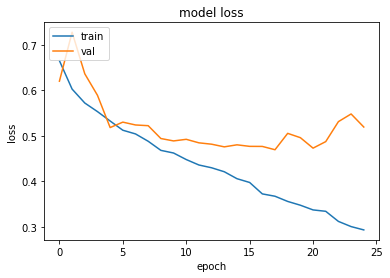

In [18]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

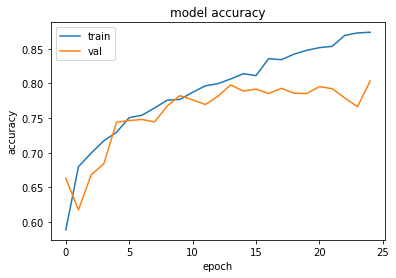

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [20]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [21]:
accuracy = round(history.history['accuracy'][-1], 2)
print(f'The model accuracy is: {accuracy}')

The model accuracy is: 0.87
